# Exploratory Data Analysis


## 1. Setup


### 1.1 Imports


In [1]:
from scripts.data_loader import *
from scripts.preprocessor import *
from scripts.feature_analysis import *

### 1.2 Loading Dataset


In [6]:
# Load data into DataFrames.
df = load_data("data")
df = remove_fillers(df)
df = fill_missing(df, "mean")
df = transform_data(df)
df = set_types(
    df,
    {
        "x": int,
        "y": int,
        "year": int,
        "ice_mask": int,
    },
)
print(f"📊 Data: \n {df.head()}\n")
features, targets = split_features_targets(df)
variables = [
    "air_temperature",
    "ocean_temperature",
    "precipitation",
    "ice_thickness",
    "ice_mask",
    "ice_velocity",
]
boundary_conditions = ["precipitation", "air_temperature", "ocean_temperature"]

📊 Data: 
      x   y  ice_thickness  ice_velocity  ice_mask  precipitation  \
14 -11  25           -1.0          -1.0         4     546.586731   
15 -10  25           -1.0          -1.0         4     525.335876   
16  -9  25           -1.0          -1.0         4     515.180786   
17  -8  25           -1.0          -1.0         4     506.726379   
18  -7  25           -1.0          -1.0         4     501.892181   

    air_temperature  ocean_temperature  year  
14       266.906799         272.843201  2015  
15       266.538788         272.781281  2015  
16       266.177887         272.732727  2015  
17       265.821411         272.697418  2015  
18       265.500275         272.673126  2015  



c:\Users\samma\OneDrive\Documents\GitHub\SeaLevelAI\scripts\preprocessor.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].fillna(-1)
c:\Users\samma\OneDrive\Documents\GitHub\SeaLevelAI\scripts\preprocessor.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ice_mask"] = df["ice_mask"].fillna(4)
c:\Users\samma\OneDrive\Documents\GitHub\SeaLevelAI\scripts\preprocessor.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

## 2. Feature Space


In [3]:
for feature in variables:
    save_plots(df, f"out/images/{feature}", feature)

### 2.0 Data Descriptions


In [ ]:
# Describe the data.
print(f"📊 Data description: \n {df.describe()}\n")

### 2.1 NaN Values


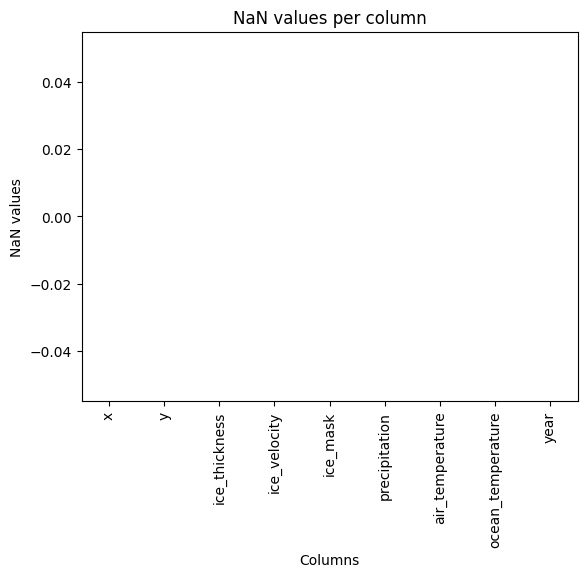

📊 NaN values per column: 
 x                    0
y                    0
ice_thickness        0
ice_velocity         0
ice_mask             0
precipitation        0
air_temperature      0
ocean_temperature    0
year                 0
dtype: int64

📊 NaN values proportion per column: 
 x                    0.0
y                    0.0
ice_thickness        0.0
ice_velocity         0.0
ice_mask             0.0
precipitation        0.0
air_temperature      0.0
ocean_temperature    0.0
year                 0.0
dtype: float64



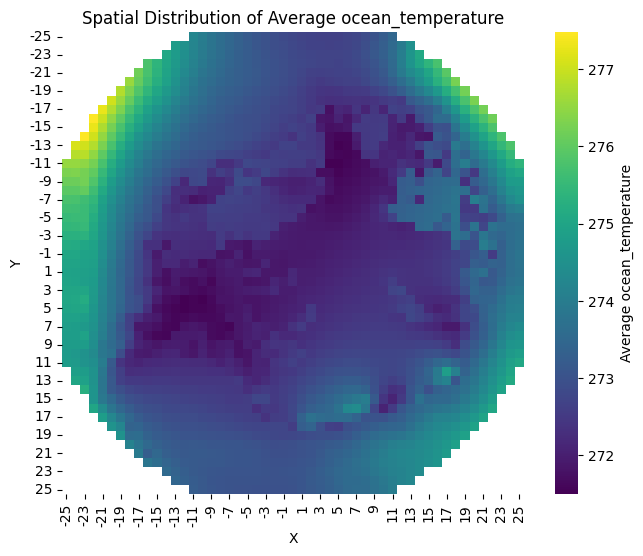

In [3]:
# Plot NaN values in each column
NaN_values = df.isna().sum()
sns.barplot(x=NaN_values.index, y=NaN_values.values)
plt.xticks(rotation=90)
plt.title("NaN values per column")
plt.xlabel("Columns")
plt.ylabel("NaN values")
plt.show()

print(f"📊 NaN values per column: \n {df.isna().sum()}\n")

# calculate each columns proportion of NaN values
NaN_proportion = df.isna().sum() / len(df)
print(f"📊 NaN values proportion per column: \n {NaN_proportion}\n")

# Plot a heatmap of NaN values
plot_spatial_heatmap(df, "ocean_temperature")

### 2.2 Outliers


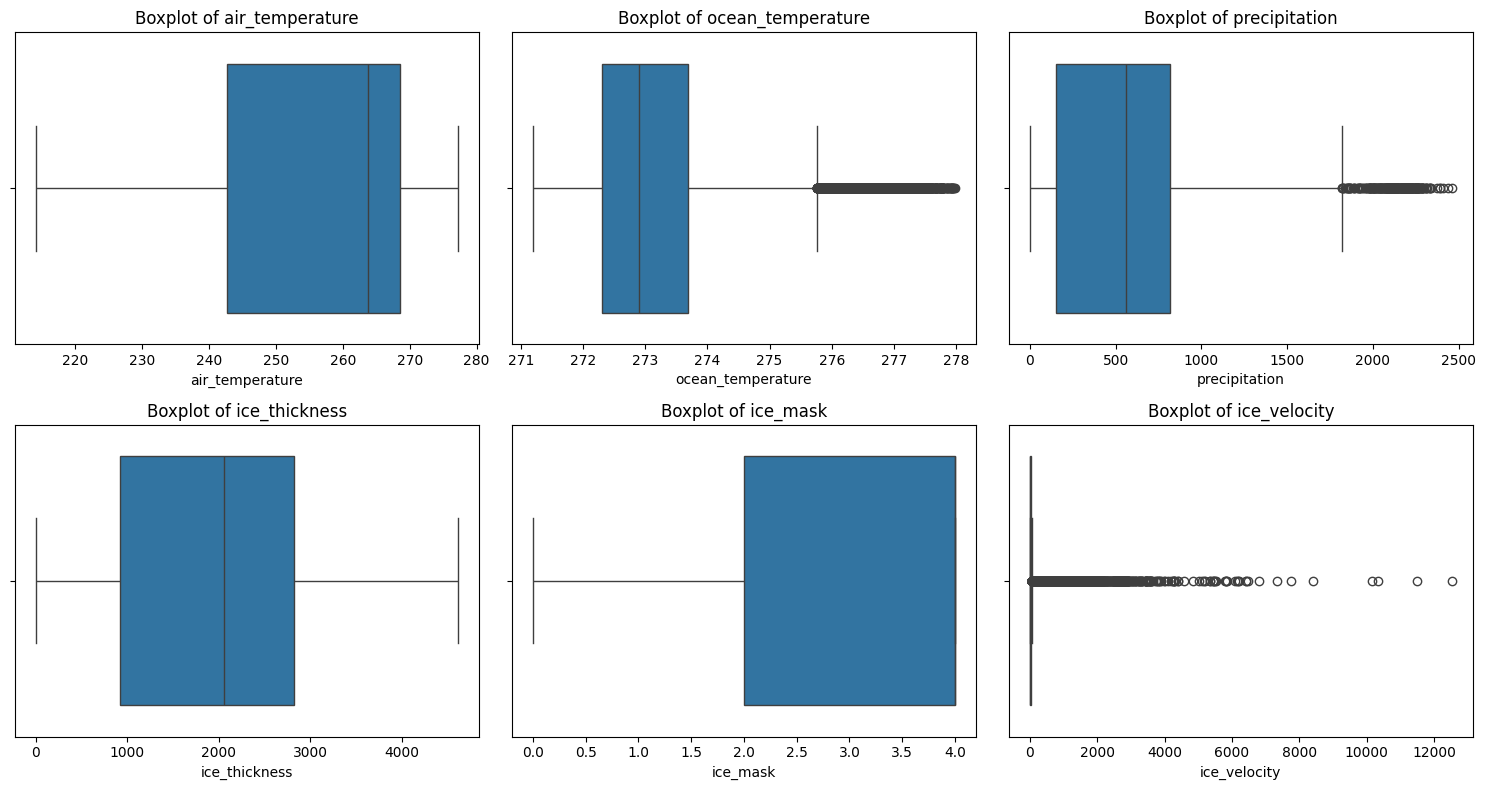

In [4]:
plot_group_boxplot(df, variables, 2, 3)

### 2.3 Duplicates


In [ ]:
print(f"📊 Duplicates: {df.duplicated().sum()}")

### 2.4 Univariate Analysis


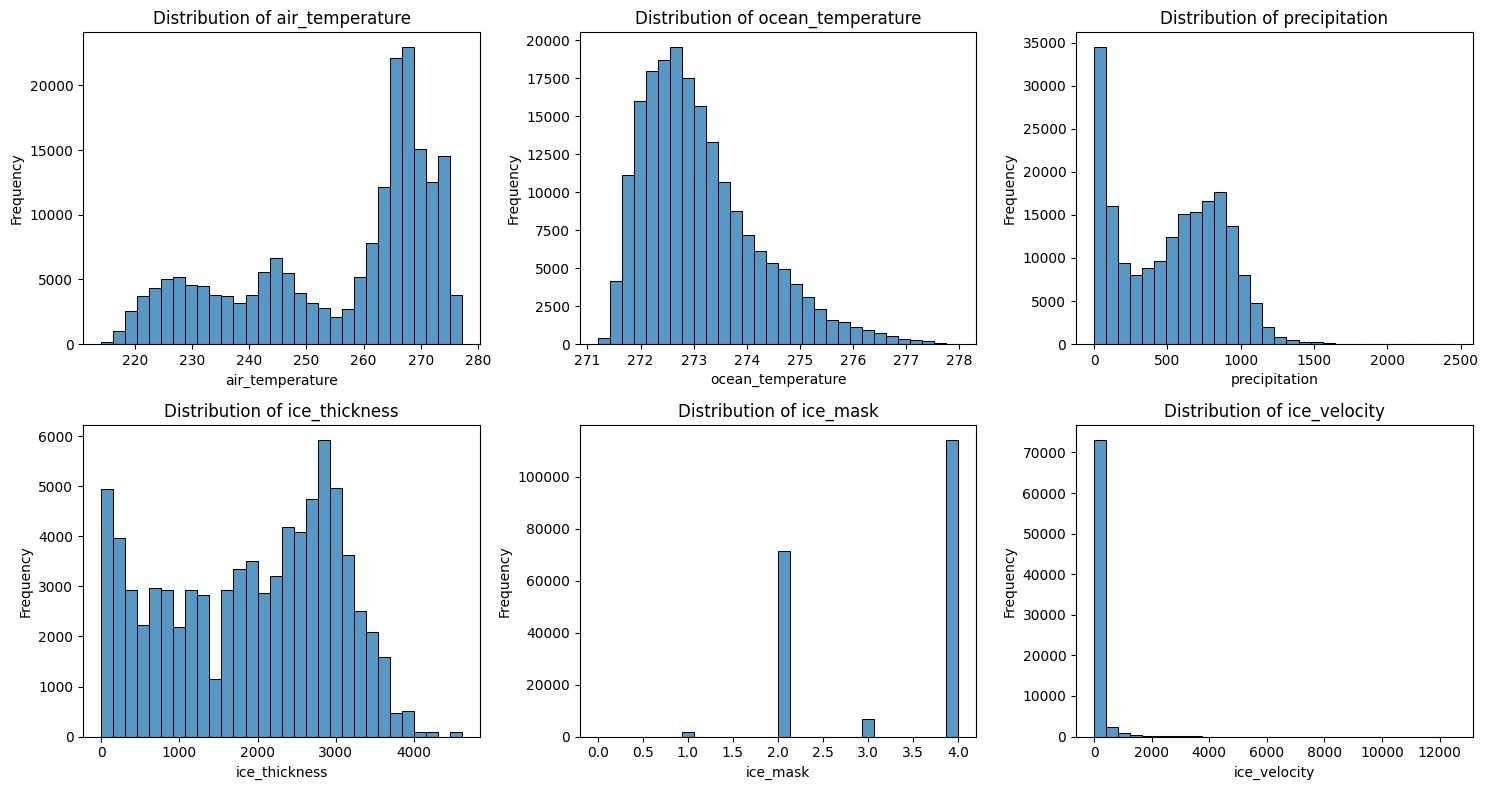

In [4]:
plot_group_histogram(df, variables, 2, 3)

### 2.5 Static Spatial Representations


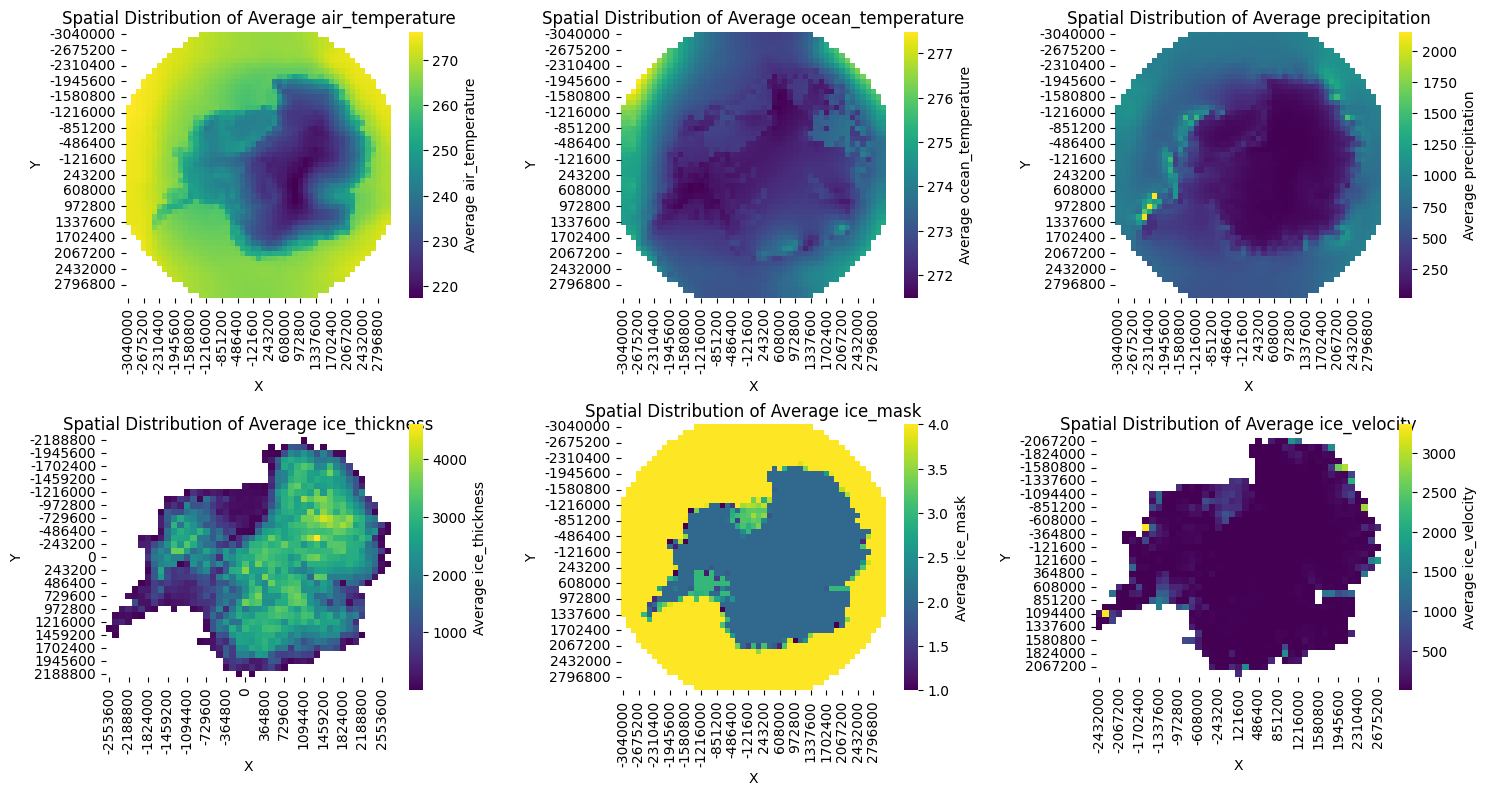

In [5]:
plot_group_spatial_heatmap(df, variables, 2, 3)

In [ ]:
for column in boundary_conditions:
    plot_spatial_heatmap(df, column)

In [ ]:
for column in targets.columns:
    plot_spatial_heatmap(df, column)

### 2.6 Dynamic Spatial Representations


In [ ]:
for column in boundary_conditions:
    create_heatmap_gif(df, column)

In [ ]:
for column in targets.columns:
    create_heatmap_gif(df, column)

### 2.7 Temporal Representations


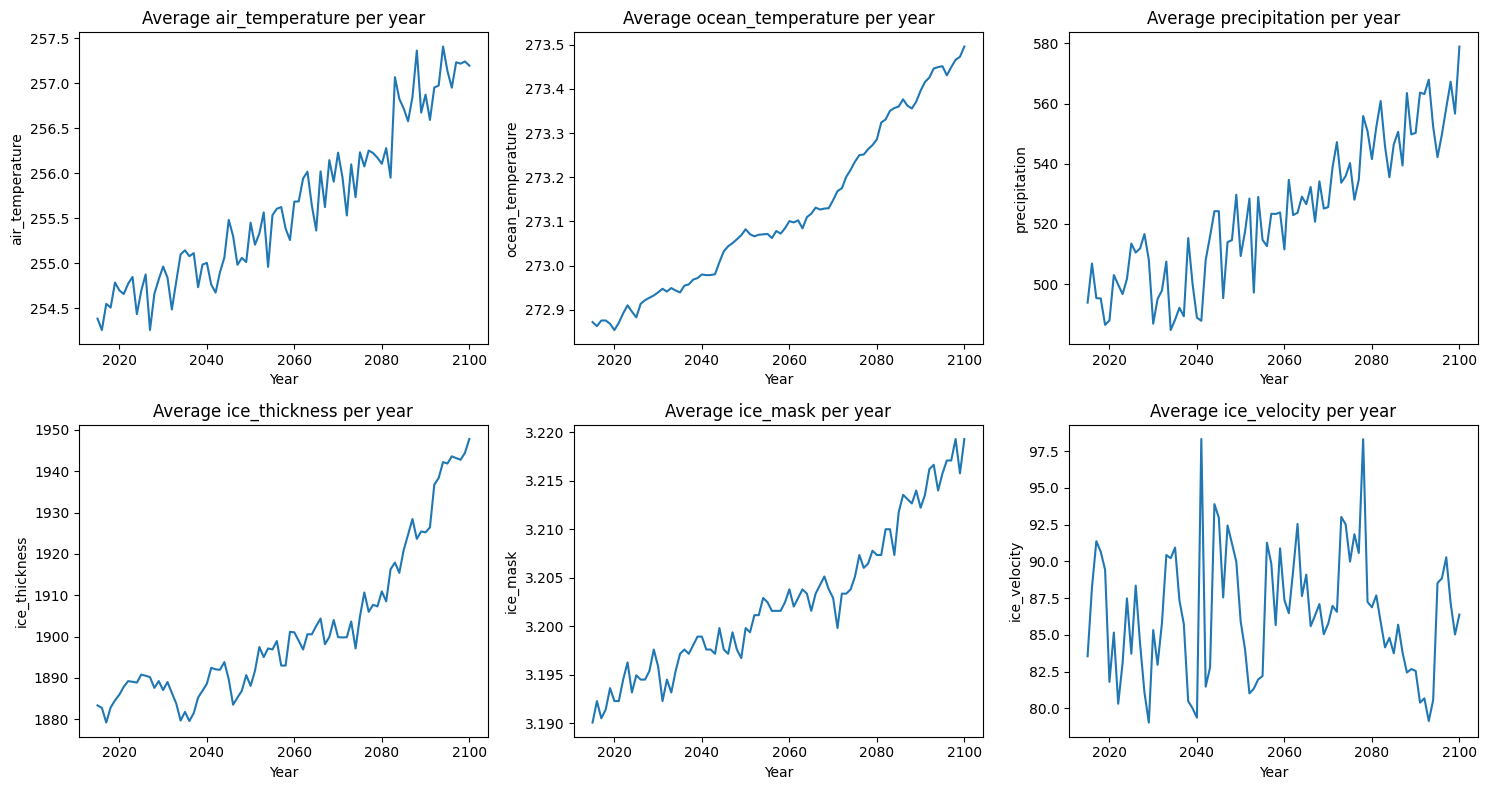

In [5]:
plot_group_line_chart(df, variables, 2, 3)

In [ ]:
for feature in boundary_conditions:
    plot_line(df, feature)

In [ ]:
for target in targets.columns:
    plot_line(df, target)

## 3. Correlation Analysis


### 3.1 Bivariate Analysis _(Inter-Feature)_


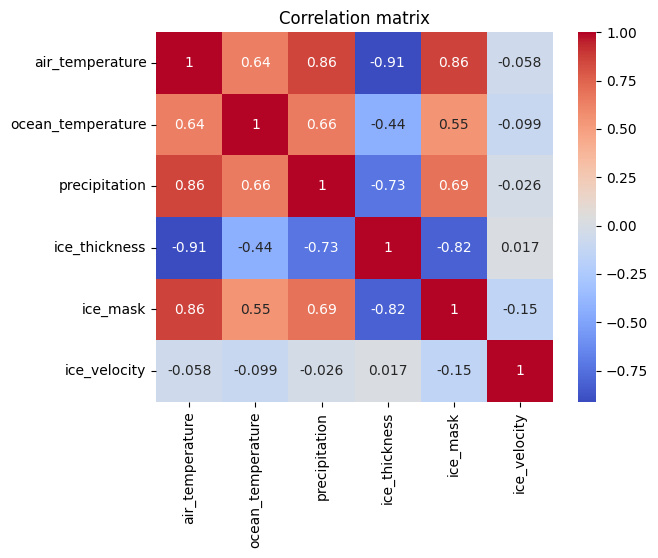

In [11]:
# Plot a correlation matrix
corr = df[variables].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

### 3.2 Bivariate Analysis _(Feature-Output)_


In [ ]:
relevant_variables = boundary_conditions + targets.columns.tolist()
plot_correlation_heatmap(df[relevant_variables])

## 3. Feature Engineering


### 3.2 Feature Creation


In [ ]:
created_features = []

#### Distance to Pole _(DTP)_


In [ ]:
df["dtp"] = np.sqrt(df["x"] ** 2 + df["y"] ** 2)
created_features.append("dtp")
plot_spatial_heatmap(df, "dtp")

#### Derivatives


In [ ]:
for column in boundary_conditions:
    df[f"d{column}_dt"] = df[column].diff()
    df.at[0, f"d{column}_dt"] = 0
    created_features.append(f"d{column}_dt")

#### Integrals


In [ ]:
for column in boundary_conditions:
    df[f"int_{column}"] = df[column].cumsum()
    created_features.append(f"int_{column}")

#### Air-Ocean Temperature Difference


In [ ]:
df["temp_diff"] = df["air_temperature"] - df["ocean_temperature"]
created_features.append("temp_diff")

#### One-Hot Encodings - Ocean & Iceless


In [ ]:
df["iceless"] = df["ice_velocity"].apply(lambda x: 1 if x == -1 else 0)
created_features.append("iceless")
df["ocean"] = df["ice_thickness"].apply(lambda x: 1 if x == 0 else 0)
created_features.append("ocean")

### 3.3 Created Feature Analysis


In [ ]:
df_created = df[created_features]
print(df_created.head())

### 3.4 Created Feature Correlation Analysis


In [ ]:
plot_correlation_heatmap(df_created, size=(20, 20))

In [ ]:
plot_correlation_heatmap(df)